In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import pickle
import random
%matplotlib notebook
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!python3 "/content/drive/My Drive/Evolution.AI---RN/more_clevr.py"

directory ./data already exists
building test datasets...
building train datasets...
building validation datasets...
saving datasets...
tcmalloc: large alloc 1143668736 bytes == 0xe2b66000 @  0x7f749c5522a4 0x591f47 0x4dd7c7 0x4e2be0 0x4e222a 0x4e0ea8 0x4e263b 0x4e1fcb 0x4e23cb 0x4e1fcb 0x4e34a6 0x454438 0x50a5aa 0x50c1f4 0x507f24 0x50b053 0x634dd2 0x634e87 0x63863f 0x6391e1 0x4b0dc0 0x7f749c14eb97 0x5b26fa
tcmalloc: large alloc 1715503104 bytes == 0x126e16000 @  0x7f749c5522a4 0x591f47 0x4dd7c7 0x4e2be0 0x4e222a 0x4e0ea8 0x4e263b 0x4e1fcb 0x4e23f3 0x4e1fcb 0x4e34a6 0x454438 0x50a5aa 0x50c1f4 0x507f24 0x50b053 0x634dd2 0x634e87 0x63863f 0x6391e1 0x4b0dc0 0x7f749c14eb97 0x5b26fa
datasets saved at ./data/more-clevr.pickle


In [ ]:
def load_data():
    print('loading data...')
    dirs = './data'
    filename = os.path.join(dirs,'more-clevr.pickle')
    with open(filename, 'rb') as f:
      train_datasets, test_datasets, val_datasets = pickle.load(f)
    rel_train = []
    rel_test = []
    rel_val = []
    norel_train = []
    norel_test = []
    norel_val = []
    print('processing data...')

    for img, relations, norelations in train_datasets:
        img = np.swapaxes(img, 0, 2)
        for qst,ans in zip(relations[0], relations[1]):
            rel_train.append((img,qst,ans))
        for qst,ans in zip(norelations[0], norelations[1]):
            norel_train.append((img,qst,ans))

    for img, relations, norelations in test_datasets:
        img = np.swapaxes(img, 0, 2)
        for qst,ans in zip(relations[0], relations[1]):
            rel_test.append((img,qst,ans))
        for qst,ans in zip(norelations[0], norelations[1]):
            norel_test.append((img,qst,ans))
            
    for img, relations, norelations in val_datasets:
        img = np.swapaxes(img, 0, 2)
        for qst,ans in zip(relations[0], relations[1]):
            rel_val.append((img,qst,ans))
        for qst,ans in zip(norelations[0], norelations[1]):
            norel_val.append((img,qst,ans))
    
    return (rel_train, rel_test,rel_val, norel_train, norel_test,norel_val)

rel_train, rel_test,rel_val,norel_train, norel_test,norel_val = load_data()

loading data...
processing data...


In [ ]:
def split_data(data):
    Q1 = []#shape of object
    Q2 = []#query vertical position->yes/no
    Q3 = []#query horizontal position->yes/no
    Q4 = []#closest-to->rectangle/circle
    Q5 = []#furthest-from->rectangle/circle
    Q6 = []#count same color->1~6
    Q7 = []#if color2 is above the current object --->yes or no
    Q8 = []#if color2 is on the left to the current object --->yes or no
    random.shuffle(data)
    for ind,sample in enumerate(data):
        Q = sample[1]
        if Q[12] == 1: #non-rel questions
            if Q[14] == 1:
                Q1.append(sample)
            elif Q[15] == 1:
                Q2.append(sample)
            elif Q[16] == 1:
                Q3.append(sample)
        elif Q[13] == 1:#rel questions
            if Q[14] == 1:
                Q4.append(sample)
            elif Q[15] == 1:
                Q5.append(sample)
            elif Q[16] == 1:
                Q6.append(sample)
            elif Q[17] == 1:
                Q7.append(sample)
            elif Q[18] == 1:
                Q8.append(sample)

    Q1 = cvt_data_axis(Q1)
    Q2 = cvt_data_axis(Q2)
    Q3 = cvt_data_axis(Q3)
    Q4 = cvt_data_axis(Q4)
    Q5 = cvt_data_axis(Q5)
    Q6 = cvt_data_axis(Q6)
    Q7 = cvt_data_axis(Q7)
    Q8 = cvt_data_axis(Q8)
    return Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
def cvt_data_axis(data):
    img = [e[0] for e in data]
    qst = [e[1] for e in data]
    ans = [e[2] for e in data]
    return (img,qst,ans)

In [ ]:
Q1_train,Q2_train,Q3_train,_,_,_,_,_ = split_data(norel_train)
Q1_test,Q2_test,Q3_test,_,_,_,_,_ = split_data(norel_test)

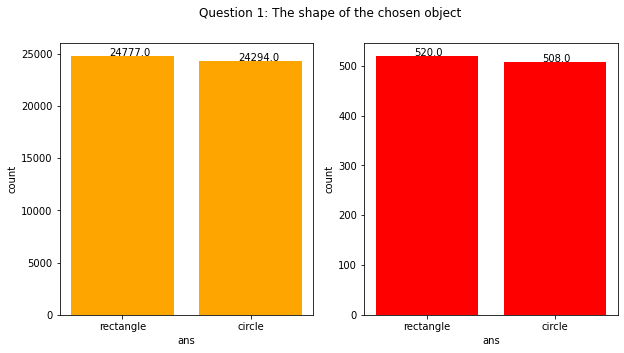

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Question 1: The shape of the chosen object')
arr1 = axs[0].hist(np.asarray(Q1_train[2][:])-2,bins = 2, rwidth = 0.8, color = 'orange')
for i in range(2):
    axs[0].text(arr1[1][i]+0.2,arr1[0][i]+0.2,str(arr1[0][i]))
axs[0].set_xticks([0.25,0.75])
axs[0].set_xticklabels( ('rectangle','circle') )
axs[0].set_xlabel('ans')
axs[0].set_ylabel('count')
arr2 = axs[1].hist(np.asarray(Q1_test[2][:])-2,bins = 2, rwidth = 0.8, color = 'red')
for i in range(2):
    axs[1].text(arr2[1][i]+0.2,arr2[0][i]+0.2,str(arr2[0][i]))
axs[1].set_xticks([0.25,0.75])
axs[1].set_xticklabels( ('rectangle','circle') )
axs[1].set_xlabel('ans')
axs[1].set_ylabel('count')

FIGname = 'Q1.png'
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/{FIGname}"
fig.savefig(FIGpath)

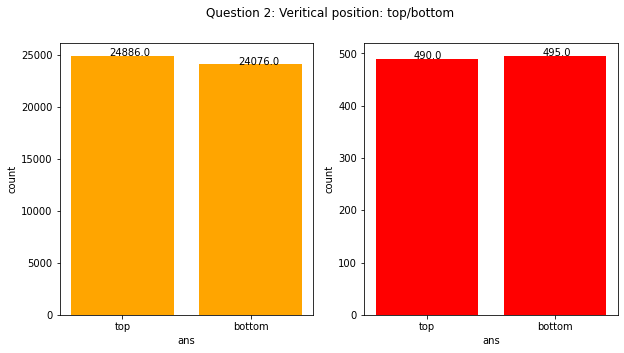

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Question 2: Veritical position: top/bottom')
arr1 = axs[0].hist(np.asarray(Q2_train[2][:]),bins = 2, rwidth = 0.8, color = 'orange')
for i in range(2):
    axs[0].text(arr1[1][i]+0.2,arr1[0][i]+0.2,str(arr1[0][i]))
axs[0].set_xticks([0.25,0.75])
axs[0].set_xticklabels( ('top','bottom') )
axs[0].set_xlabel('ans')
axs[0].set_ylabel('count')
arr2 = axs[1].hist(np.asarray(Q2_test[2][:]),bins = 2, rwidth = 0.8, color = 'red')
for i in range(2):
    axs[1].text(arr2[1][i]+0.2,arr2[0][i]+0.2,str(arr2[0][i]))
axs[1].set_xticks([0.25,0.75])
axs[1].set_xticklabels( ('top','bottom') )
axs[1].set_xlabel('ans')
axs[1].set_ylabel('count')

FIGname = 'Q2.png'
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/{FIGname}"
fig.savefig(FIGpath)

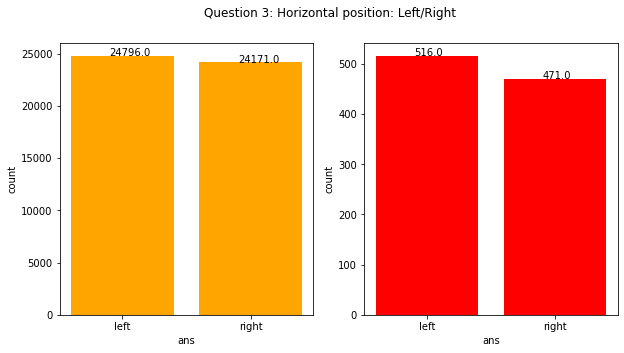

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Question 3: Horizontal position: Left/Right')
arr1 = axs[0].hist(np.asarray(Q3_train[2][:]),bins = 2, rwidth = 0.8, color = 'orange')
for i in range(2):
    axs[0].text(arr1[1][i]+0.2,arr1[0][i]+0.2,str(arr1[0][i]))
axs[0].set_xticks([0.25,0.75])
axs[0].set_xticklabels( ('left','right') )
axs[0].set_xlabel('ans')
axs[0].set_ylabel('count')
arr2 = axs[1].hist(np.asarray(Q3_test[2][:]),bins = 2, rwidth = 0.8, color = 'red')
for i in range(2):
    axs[1].text(arr2[1][i]+0.2,arr2[0][i]+0.2,str(arr2[0][i]))
axs[1].set_xticks([0.25,0.75])
axs[1].set_xticklabels( ('left','right') )
axs[1].set_xlabel('ans')
axs[1].set_ylabel('count')
FIGname = 'Q3.png'
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/{FIGname}"
fig.savefig(FIGpath)

In [ ]:
_,_,_,Q4_train,Q5_train,Q6_train,Q7_train,Q8_train = split_data(rel_train)
_,_,_,Q4_test,Q5_test,Q6_test,Q7_test,Q8_test = split_data(rel_test)

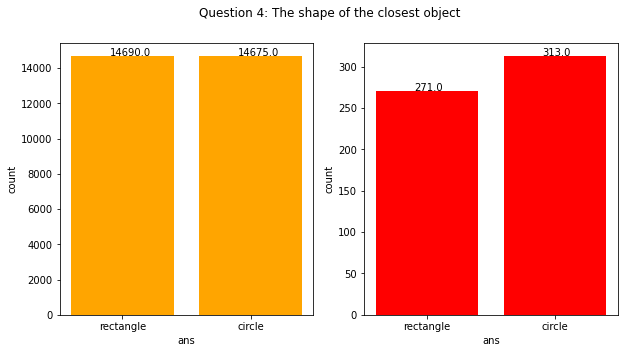

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Question 4: The shape of the closest object')
arr1 = axs[0].hist(np.asarray(Q4_train[2][:])-2,bins = 2, rwidth = 0.8, color = 'orange')
for i in range(2):
    axs[0].text(arr1[1][i]+0.2,arr1[0][i]+0.2,str(arr1[0][i]))
axs[0].set_xticks([0.25,0.75])
axs[0].set_xticklabels( ('rectangle','circle') )
axs[0].set_xlabel('ans')
axs[0].set_ylabel('count')
arr2 = axs[1].hist(np.asarray(Q4_test[2][:])-2,bins = 2, rwidth = 0.8, color = 'red')
for i in range(2):
    axs[1].text(arr2[1][i]+0.2,arr2[0][i]+0.2,str(arr2[0][i]))
axs[1].set_xticks([0.25,0.75])
axs[1].set_xticklabels( ('rectangle','circle') )
axs[1].set_xlabel('ans')
axs[1].set_ylabel('count')
FIGname = 'Q4.png'
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/{FIGname}"
fig.savefig(FIGpath)

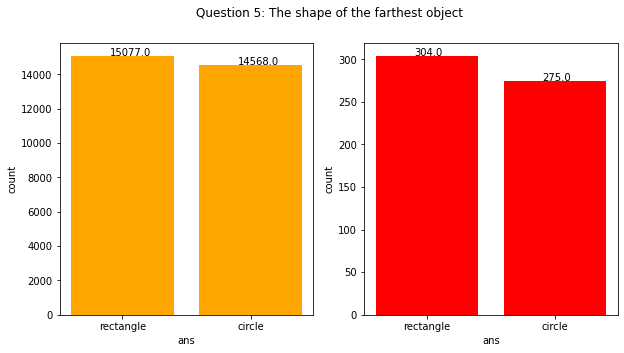

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Question 5: The shape of the farthest object')
arr1 = axs[0].hist(np.asarray(Q5_train[2][:])-2,bins = 2, rwidth = 0.8, color = 'orange')
for i in range(2):
    axs[0].text(arr1[1][i]+0.2,arr1[0][i]+0.2,str(arr1[0][i]))
axs[0].set_xticks([0.25,0.75])
axs[0].set_xticklabels( ('rectangle','circle') )
axs[0].set_xlabel('ans')
axs[0].set_ylabel('count')
arr2 = axs[1].hist(np.asarray(Q5_test[2][:])-2,bins = 2, rwidth = 0.8, color = 'red')
for i in range(2):
    axs[1].text(arr2[1][i]+0.2,arr2[0][i]+0.2,str(arr2[0][i]))
axs[1].set_xticks([0.25,0.75])
axs[1].set_xticklabels( ('rectangle','circle') )
axs[1].set_xlabel('ans')
axs[1].set_ylabel('count')
FIGname = 'Q5.png'
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/{FIGname}"
fig.savefig(FIGpath)

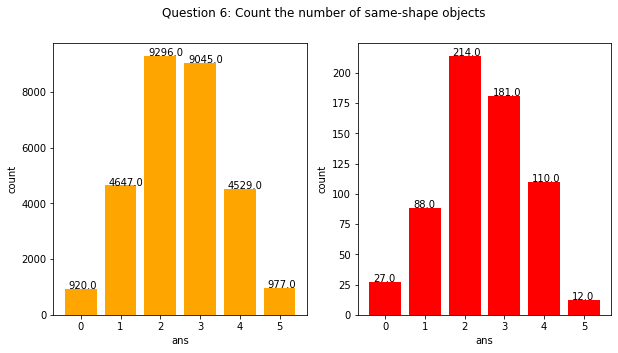

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Question 6: Count the number of same-shape objects')
arr1 = axs[0].hist(np.asarray(Q6_train[2][:])-4,bins = np.arange(7)-0.5, rwidth = 0.8, color = 'orange')
for i in range(6):
    axs[0].text(arr1[1][i]+0.2,arr1[0][i]+0.2,str(arr1[0][i]))
axs[0].set_xlabel('ans')
axs[0].set_ylabel('count')
arr2 = axs[1].hist(np.asarray(Q6_test[2][:])-4,bins = np.arange(7)-0.5, rwidth = 0.8, color = 'red')
for i in range(6):
    axs[1].text(arr2[1][i]+0.2,arr2[0][i]+0.2,str(arr2[0][i]))
axs[1].set_xlabel('ans')
axs[1].set_ylabel('count')
FIGname = 'Q6.png'
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/{FIGname}"
fig.savefig(FIGpath)

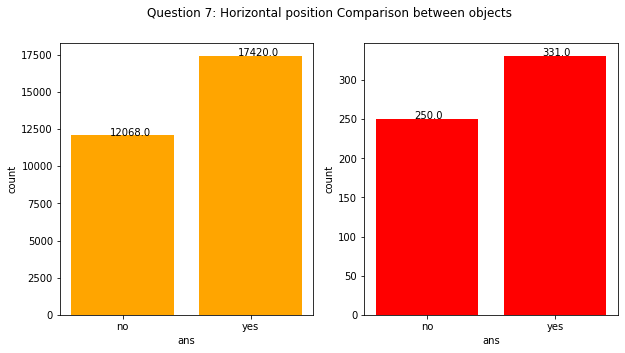

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Question 7: Horizontal position Comparison between objects')
arr1 = axs[0].hist(np.asarray(Q7_train[2][:]),bins = 2, rwidth = 0.8, color = 'orange')
for i in range(2):
    axs[0].text(arr1[1][i]+0.2,arr1[0][i]+0.2,str(arr1[0][i]))
axs[0].set_xticks([0.25,0.75])
axs[0].set_xticklabels( ('no','yes') )
axs[0].set_xlabel('ans')
axs[0].set_ylabel('count')
arr2 = axs[1].hist(np.asarray(Q7_test[2][:]),bins = 2, rwidth = 0.8, color = 'red')
for i in range(2):
    axs[1].text(arr2[1][i]+0.2,arr2[0][i]+0.2,str(arr2[0][i]))
axs[1].set_xticks([0.25,0.75])
axs[1].set_xticklabels( ('no','yes') )
axs[1].set_xlabel('ans')
axs[1].set_ylabel('count')
FIGname = 'Q7.png'
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/{FIGname}"
fig.savefig(FIGpath)

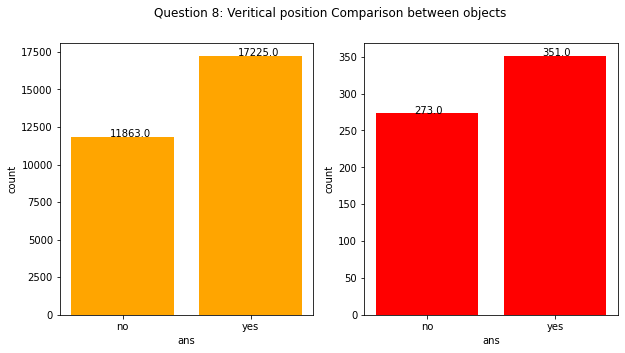

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Question 8: Veritical position Comparison between objects')
arr1 = axs[0].hist(np.asarray(Q8_train[2][:]),bins = 2, rwidth = 0.8, color = 'orange')
for i in range(2):
    axs[0].text(arr1[1][i]+0.2,arr1[0][i]+0.2,str(arr1[0][i]))
axs[0].set_xticks([0.25,0.75])
axs[0].set_xticklabels( ('no','yes') )
axs[0].set_xlabel('ans')
axs[0].set_ylabel('count')
arr2 = axs[1].hist(np.asarray(Q8_test[2][:]),bins = 2, rwidth = 0.8, color = 'red')
for i in range(2):
    axs[1].text(arr2[1][i]+0.2,arr2[0][i]+0.2,str(arr2[0][i]))
axs[1].set_xticks([0.25,0.75])
axs[1].set_xticklabels( ('no','yes') )
axs[1].set_xlabel('ans')
axs[1].set_ylabel('count')
FIGname = 'Q8.png'
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/{FIGname}"
fig.savefig(FIGpath)

In [ ]:
import torch
input = torch.randn(3, 5, requires_grad=True)
target = torch.tensor([0,0,0])
input[:,0] = -10
#input = input-torch.max(input)
output = torch.nn.functional.nll_loss(torch.nn.functional.log_softmax(input), target)
output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor(11.1292, grad_fn=<NllLossBackward>)

In [ ]:
output = torch.nn.functional.nll_loss(torch.nn.functional.log_softmax(input-torch.max(input)), target)
output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor(11.1292, grad_fn=<NllLossBackward>)

In [ ]:
input - torch.max(input,1,keepdim=True)[0]

tensor([[-10.0567,  -0.9830,   0.0000,  -0.8874,  -0.0646],
        [-10.9506,  -0.7089,   0.0000,  -1.2555,  -3.2942],
        [-10.5183,  -2.1885,  -2.0556,   0.0000,  -2.7711]],
       grad_fn=<SubBackward0>)

In [ ]:
input

tensor([[-1.0000e+01, -9.2622e-01,  5.6736e-02, -8.3069e-01, -7.9062e-03],
        [-1.0000e+01,  2.4172e-01,  9.5058e-01, -3.0494e-01, -2.3437e+00],
        [-1.0000e+01, -1.6701e+00, -1.5373e+00,  5.1833e-01, -2.2527e+00]],
       grad_fn=<CopySlices>)

In [ ]:
objects = []
for i in range(6):
  center = np.random.randint(5, 70, 2)
  color = np.zeros(6)
  color[4] = 1
  shape = np.asarray([1,0])
  objects.append(np.hstack((color,center,shape)))
objects

[array([ 0.,  0.,  0.,  0.,  1.,  0., 30., 11.,  1.,  0.]),
 array([ 0.,  0.,  0.,  0.,  1.,  0., 33., 17.,  1.,  0.]),
 array([ 0.,  0.,  0.,  0.,  1.,  0., 28., 20.,  1.,  0.]),
 array([ 0.,  0.,  0.,  0.,  1.,  0., 30., 16.,  1.,  0.]),
 array([ 0.,  0.,  0.,  0.,  1.,  0., 22., 49.,  1.,  0.]),
 array([ 0.,  0.,  0.,  0.,  1.,  0., 69., 19.,  1.,  0.])]

In [ ]:
flat_list = [item for sublist in objects for item in sublist]

In [ ]:
!python3 "/content/drive/My Drive/Evolution.AI---RN/more_clevr_state.py"

directory ./data already exists
building test datasets...
building train datasets...
building validation datasets...
saving datasets...
datasets saved at ./data/more-clevr_state.pickle


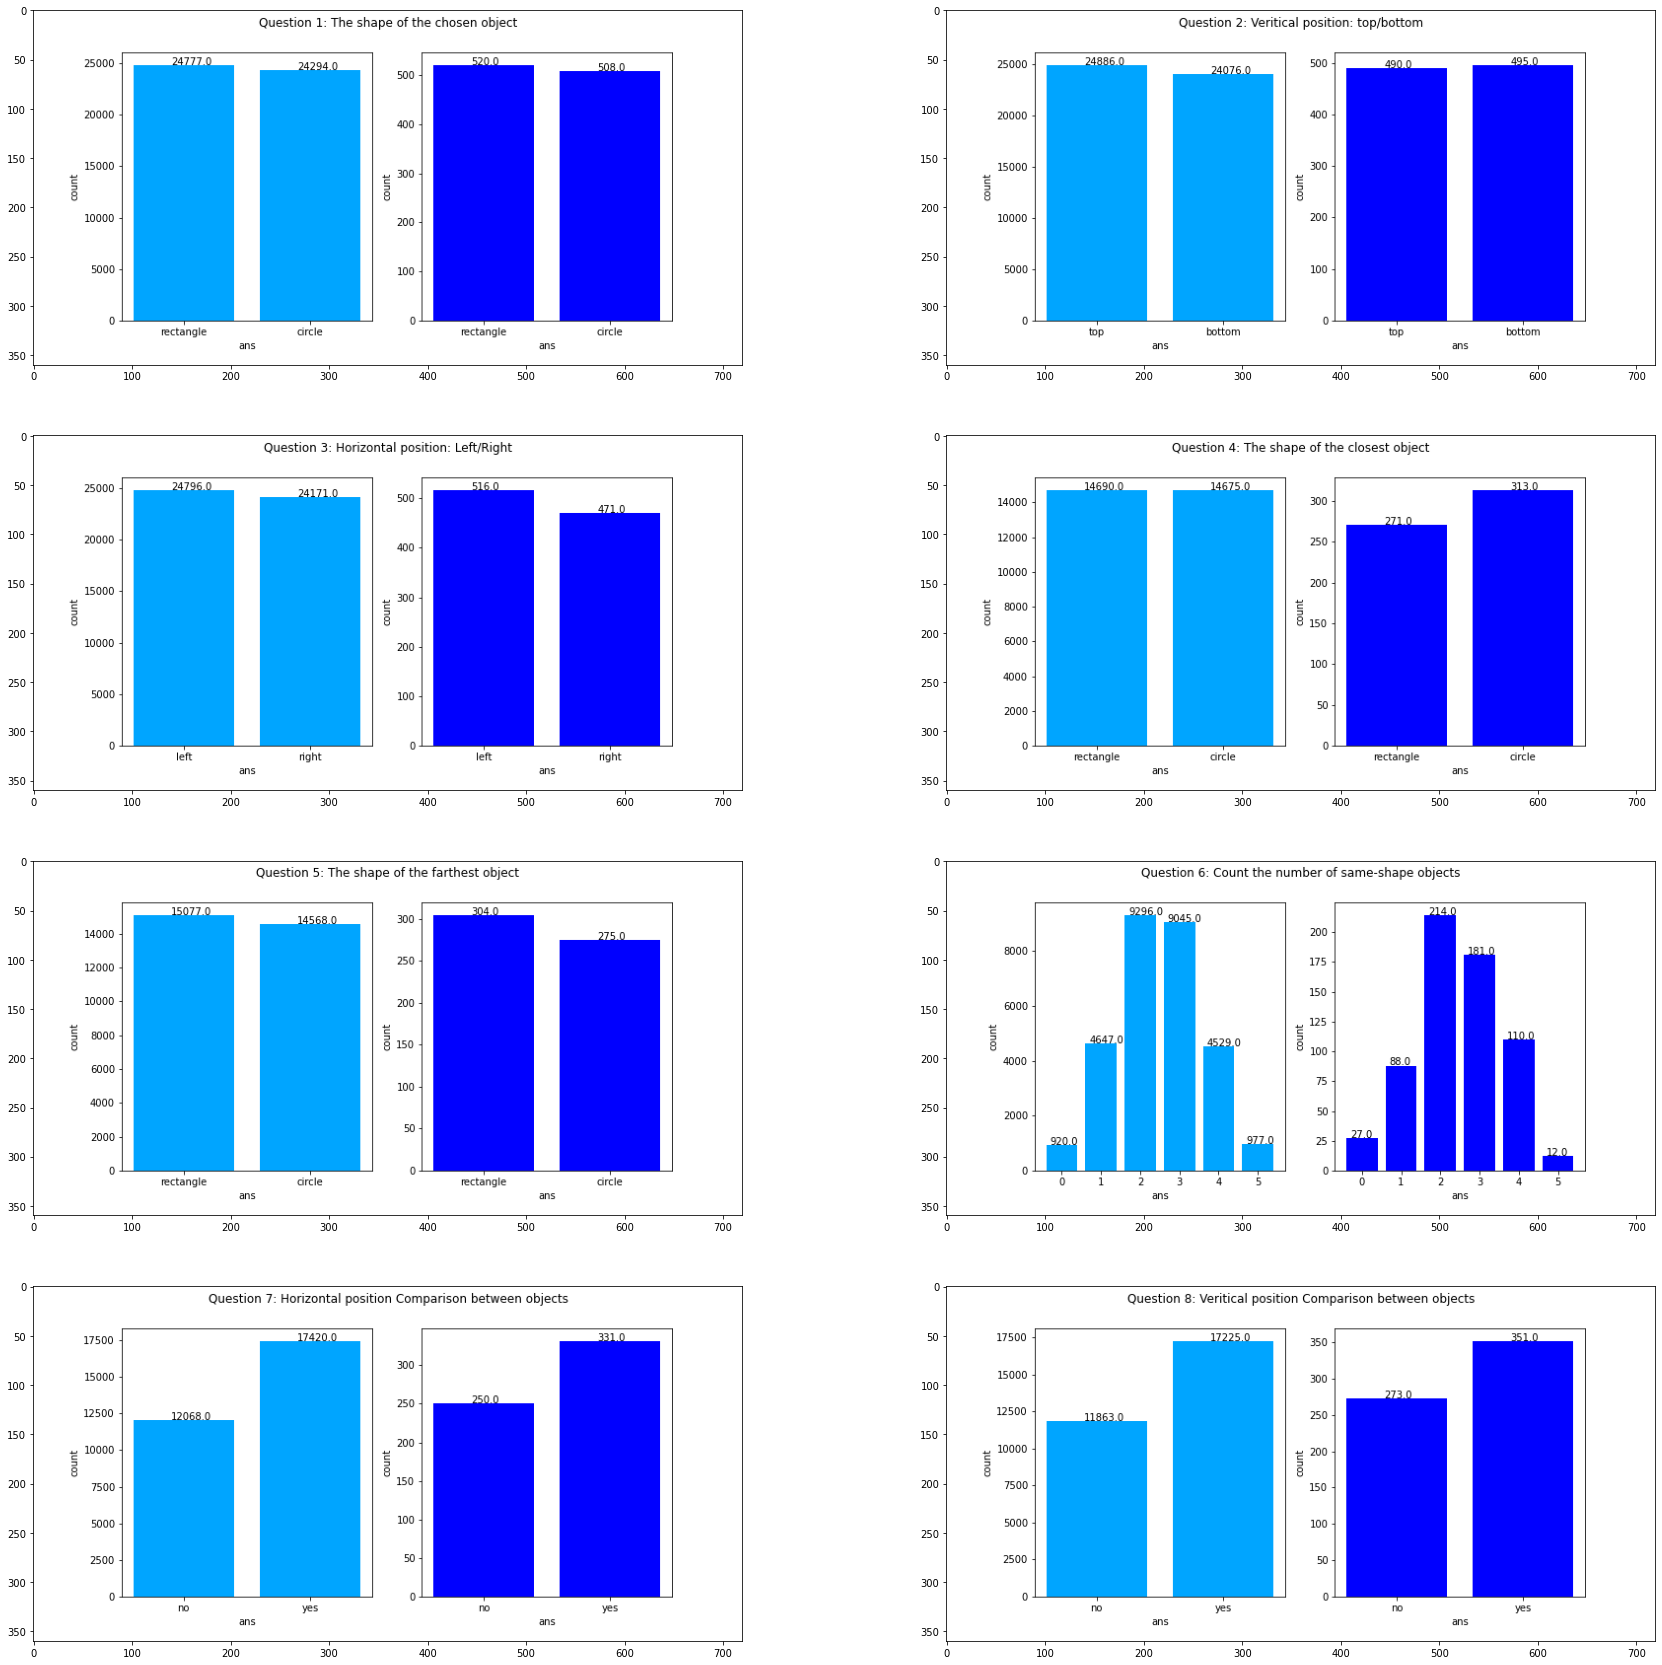

In [ ]:
import cv2
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/Q1.png"
im1 = cv2.imread(FIGpath)
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/Q2.png"
im2 = cv2.imread(FIGpath)
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/Q3.png"
im3 = cv2.imread(FIGpath)
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/Q4.png"
im4 = cv2.imread(FIGpath)
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/Q5.png"
im5 = cv2.imread(FIGpath)
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/Q6.png"
im6 = cv2.imread(FIGpath)
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/Q7.png"
im7 = cv2.imread(FIGpath)
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/Q8.png"
im8 = cv2.imread(FIGpath)

fig, axs = plt.subplots(4,2,figsize=(30,30))
axs[0,0].imshow(im1)
axs[0,1].imshow(im2)
axs[1,0].imshow(im3)
axs[1,1].imshow(im4)
axs[2,0].imshow(im5)
axs[2,1].imshow(im6)
axs[3,0].imshow(im7)
axs[3,1].imshow(im8)

FIGname = 'all_quest.png'
FIGpath = F"/content/drive/My Drive/Evolution.AI---RN/{FIGname}"
fig.savefig(FIGpath,bbox_inches='tight')

In [ ]:
np.shape(im)

()